In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("D:/AIML/Image classification/Apparel/train_data/fashion-mnist_train.csv")

In [3]:
data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(data)
m, n = data.shape

dev_data = data[0:1000].T
Y_dev = dev_data[0]
X_dev = dev_data[1:n]
X_dev = X_dev/255.

train_data = data[1000:m].T
Y_train = train_data[0]
X_train = train_data[1:n]
X_train = X_train/255.

In [6]:
X_train[:, 0, None].shape

(784, 1)

In [6]:
def init_params():
    w1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    w2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return w1, b1, w2, b2

def RelU(x):
    return np.maximum(x, 0)

def softmax(x):
    return np.exp(x)/sum(np.exp(x))

def forward_propagation(w1, b1, w2, b2, X):
    z1 = w1.dot(X) + b1
    a1 = RelU(z1)
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

def targets(x):
    target_value = np.zeros((x.size, x.max()+1))
    target_value[np.arange(x.size), x] = 1
    target_value = target_value.T
    return target_value

def derivative_relu(x):
    return x>0

def backward_propagation(z1, a1, z2, a2, X, Y, w1, w2):
    m=Y.size
    target_values = targets(Y)
    dz2 = a2 - target_values
    dw2 = 1 / m * dz2.dot(a1.T)
    db2 = np.sum(dz2) / m
    dz1 = w2.T.dot(dz2) * derivative_relu(z1)
    dw1 = 1 / m * dz1.dot(X.T)
    db1 = np.sum(dz1) / m
    return dw1, db1, dw2, db2

In [9]:
def update_params(dw1, db1, dw2, db2, w1, b1, w2, b2, alpha):
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1
    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2
    return w1, b1, w2, b2

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions==Y)/Y.size

def get_predictions(a2):
    return np.argmax(a2, 0)

def gradient_descent(X, Y, iterations, alpha):
    w1, b1, w2, b2 = init_params()
    for i in range(iterations):
        z1, a1, z2, a2 = forward_propagation(w1, b1, w2, b2, X)
        dw1, db1, dw2, db2 = backward_propagation(z1, a1, z2, a2, X, Y, w1, w2)
        w1, b1, w2, b2 = update_params(dw1, db1, dw2, db2, w1, b1, w2, b2, alpha)
        if i%10 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(a2),Y))
    return w1, b1, w2, b2


In [10]:
w1, b1, w2, b2 = gradient_descent(X_train, Y_train, 1000, 0.1)

Iteration:  0
[6 6 6 ... 6 6 6] [8 0 6 ... 8 8 7]
Accuracy:  0.07998305084745763
Iteration:  10
[8 8 1 ... 8 8 8] [8 0 6 ... 8 8 7]
Accuracy:  0.27061016949152544
Iteration:  20
[8 8 1 ... 8 8 8] [8 0 6 ... 8 8 7]
Accuracy:  0.31813559322033896
Iteration:  30
[8 8 1 ... 8 8 8] [8 0 6 ... 8 8 7]
Accuracy:  0.34511864406779663
Iteration:  40
[8 8 0 ... 8 8 8] [8 0 6 ... 8 8 7]
Accuracy:  0.3835593220338983
Iteration:  50
[7 8 0 ... 8 8 8] [8 0 6 ... 8 8 7]
Accuracy:  0.45505084745762714
Iteration:  60
[7 8 0 ... 8 6 8] [8 0 6 ... 8 8 7]
Accuracy:  0.48738983050847456
Iteration:  70
[7 4 0 ... 8 6 8] [8 0 6 ... 8 8 7]
Accuracy:  0.5337966101694915
Iteration:  80
[7 6 0 ... 8 8 8] [8 0 6 ... 8 8 7]
Accuracy:  0.5604406779661016
Iteration:  90
[7 6 0 ... 8 8 8] [8 0 6 ... 8 8 7]
Accuracy:  0.5846949152542373
Iteration:  100
[7 6 0 ... 8 8 5] [8 0 6 ... 8 8 7]
Accuracy:  0.606
Iteration:  110
[7 6 0 ... 8 8 5] [8 0 6 ... 8 8 7]
Accuracy:  0.6213389830508474
Iteration:  120
[7 6 0 ... 8 8 5] 

In [11]:
def make_predictions(X, w1, b1, w2, b2):
    _, _, _, a2 = forward_propagation(w1, b1, w2, b2, X)
    predictions = get_predictions(a2)
    return predictions

def test_prediction(index, w1, b1, w2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(current_image, w1, b1, w2, b2)
    label = Y_train[index]
    names = {0: "T-shirt", 1:"Trouser", 2:"Pullover", 3:"Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8:"Bag", 9:"Ankle Boot"}
    print("Prediction: ", names[prediction[0]])
    print("Label: ", names[label])
    current_image = current_image.reshape((28,28))*255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  Bag
Label:  Bag


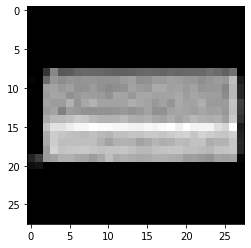

In [12]:
test_prediction(0, w1, b1, w2, b2)

Prediction:  Bag
Label:  Bag


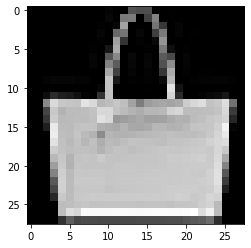

In [13]:
test_prediction(1000, w1, b1, w2, b2)

Prediction:  Bag
Label:  Bag


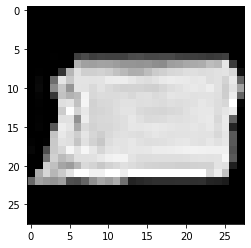

In [14]:
test_prediction(5846, w1, b1, w2, b2)

Prediction:  Sneaker
Label:  Sneaker


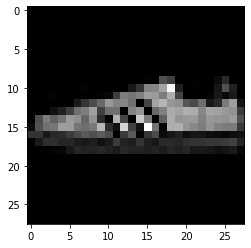

In [15]:
test_prediction(5, w1, b1, w2, b2)

Prediction:  Shirt
Label:  Pullover


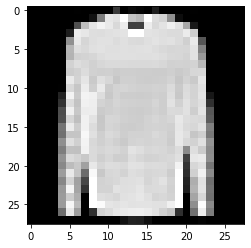

In [16]:
test_prediction(7646, w1, b1, w2, b2)

In [17]:
dev_predictions = make_predictions(X_dev, w1, b1, w2, b2)
get_accuracy(dev_predictions, Y_dev)

[8 9 6 0 3 4 4 5 4 8 0 9 9 6 2 2 9 3 3 3 8 7 4 4 0 4 4 8 7 1 5 0 5 6 3 9 0
 4 2 1 4 0 9 0 0 5 2 7 7 2 5 4 2 4 1 4 9 8 0 4 5 5 6 3 5 8 5 9 8 1 4 8 1 2
 2 8 4 4 4 5 3 2 4 4 1 2 7 3 4 2 0 5 0 1 7 3 7 8 2 3 8 5 0 5 3 0 8 5 6 1 0
 7 4 1 9 7 6 9 3 3 2 4 0 6 3 0 1 5 9 7 7 0 3 6 7 2 4 1 3 1 0 2 3 6 3 6 0 5
 9 3 7 4 6 8 8 0 7 5 2 1 9 5 3 7 0 8 9 7 7 8 0 9 4 6 0 4 1 9 6 7 2 3 0 0 8
 3 5 4 3 6 6 1 7 7 5 7 5 8 0 4 3 9 5 4 5 3 2 7 6 9 4 9 4 1 2 7 1 8 3 1 3 0
 0 3 4 2 8 9 2 8 8 2 6 2 8 7 0 1 4 9 5 1 9 0 7 7 7 2 3 8 6 4 5 9 3 3 9 1 1
 3 0 7 1 6 9 9 4 2 3 3 1 4 9 3 7 4 6 7 0 1 1 8 4 4 1 0 3 1 5 5 8 4 7 2 1 8
 4 5 9 6 3 8 9 9 3 4 0 3 4 6 1 9 8 2 7 3 0 3 9 7 6 3 7 3 2 0 0 4 5 8 2 9 8
 2 8 5 3 2 7 3 0 2 3 4 6 4 2 4 0 8 8 2 3 6 4 5 4 0 7 2 2 7 8 5 4 9 3 2 2 5
 4 1 1 3 5 0 3 5 2 7 7 3 5 8 9 3 0 9 0 4 5 2 3 5 2 6 7 9 3 5 0 0 4 7 6 3 2
 3 2 0 3 5 2 6 9 0 1 0 3 3 1 6 8 4 9 9 0 6 3 7 7 4 8 9 5 2 4 4 9 0 3 0 0 5
 4 9 7 8 7 5 6 4 8 6 3 0 4 0 0 9 2 4 1 0 3 7 0 3 9 9 8 7 0 9 0 3 7 8 3 3 7
 3 6 0 6 6 0 6 0 1 9 9 7 

0.798